# Homework (12 pts) - Cross Validation

## Nisha Dalal nd8288

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import LeaveOneOut

%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [3]:
# features (X) are already mean subtracted and normalized
X = diabetes.data
# target disease progression values are NOT mean subtraced or normalized
y = diabetes.target

1. (3 pts) Split dataset into training (80%) and testing (20%) sets.

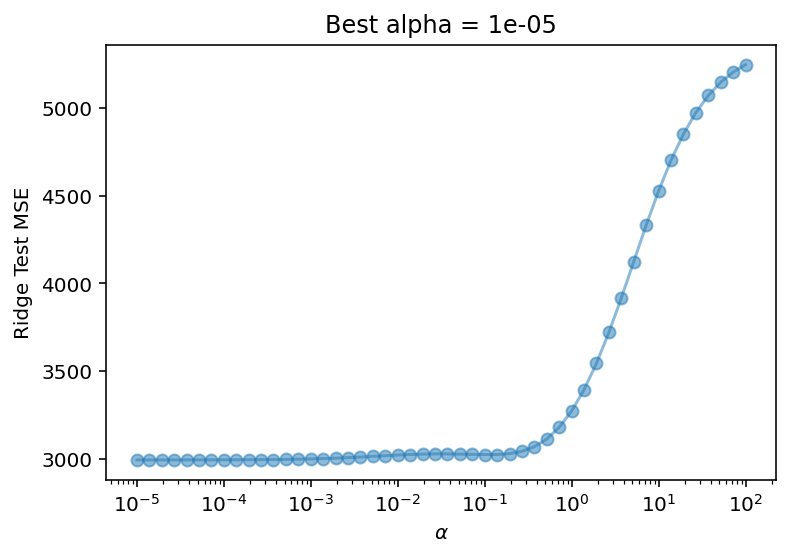

In [4]:
# exact way data are split is determined by random_state
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=1)
alphas = np.logspace(-5, 2, 50)
mse = np.zeros(alphas.shape)
for i, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha)
    model.fit(Xs_train, ys_train)
    residuals = ys_test - model.predict(Xs_test)
    mse[i] = np.sum(residuals**2) / len(residuals)

ind = np.argmin(mse)
alpha = alphas[ind]
plt.plot(alphas, mse, 'o-', alpha=0.5)
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Ridge Test MSE')
plt.title(f"Best alpha = {alpha}")
plt.show()

2. (3 pts) Use Ridge regression and 5-fold cross validation to model your training set.

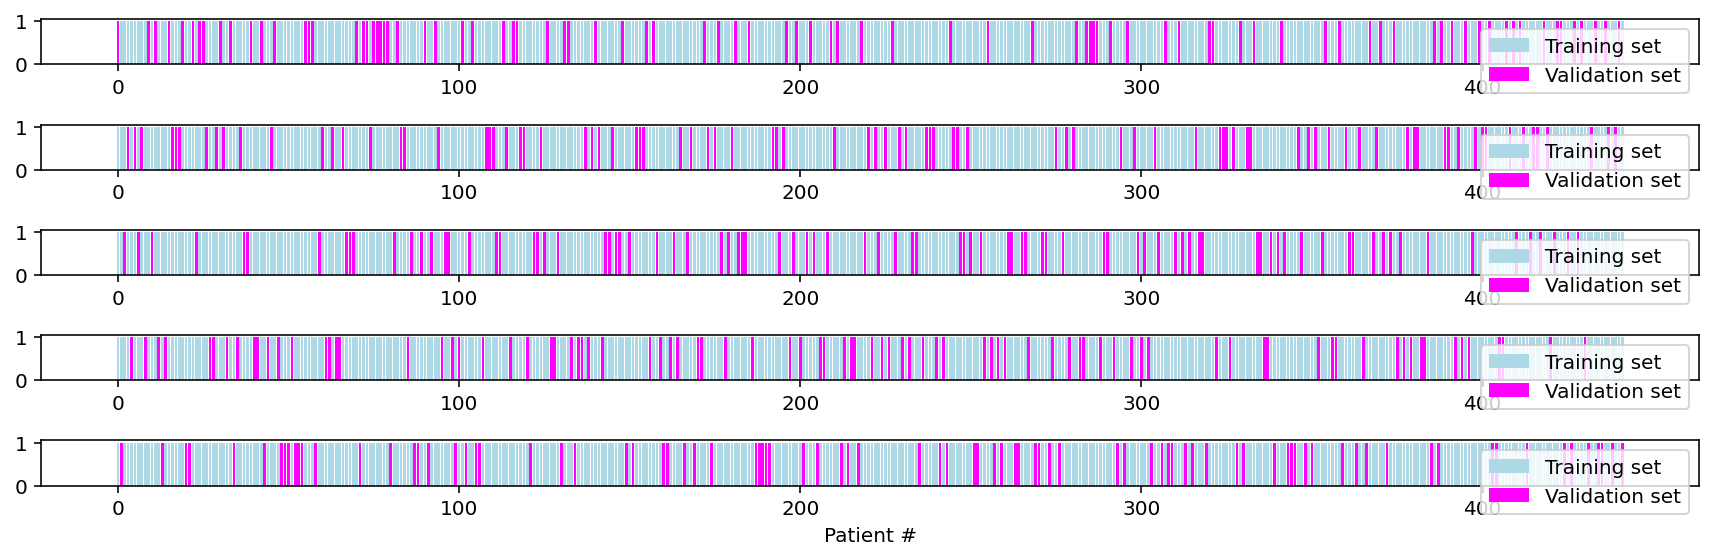

In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = np.logspace(-5, 2, 50)
mse = np.zeros(alphas.shape)

for i, alpha in enumerate(alphas):
    val_errors = []
    for train_index, val_index in kf.split(X, y):
        # training set
        Xs_train = X[train_index,:]
        ys_train = y[train_index]
        
        # validation set
        Xs_val = X[val_index,:]
        ys_val = y[val_index]
        
        # ridge model
        model = Ridge(alpha=alpha)
        
        # fit model to training set
        model.fit(Xs_train, ys_train)
        
        # get error from validation set
        val_mse = np.mean((ys_val - model.predict(Xs_val))**2)
        val_errors.append(val_mse)
    
    # for each alpha, we take the mean error across all K-folds
    mse[i] = np.mean(val_errors)

plt.figure(figsize=(12,4))
k = 1
for train_index, val_index in kf.split(X, y):
    plt.subplot(5, 1, k)
    plt.bar(train_index, np.ones(train_index.shape), color='lightblue', label='Training set')
    plt.bar(val_index, np.ones(val_index.shape), color='magenta', label='Validation set')
    plt.legend()
    k += 1
plt.xlabel('Patient #')
plt.tight_layout()

3. (3 pts) Use Lasso regression and 5-fold cross validation to model your training set.

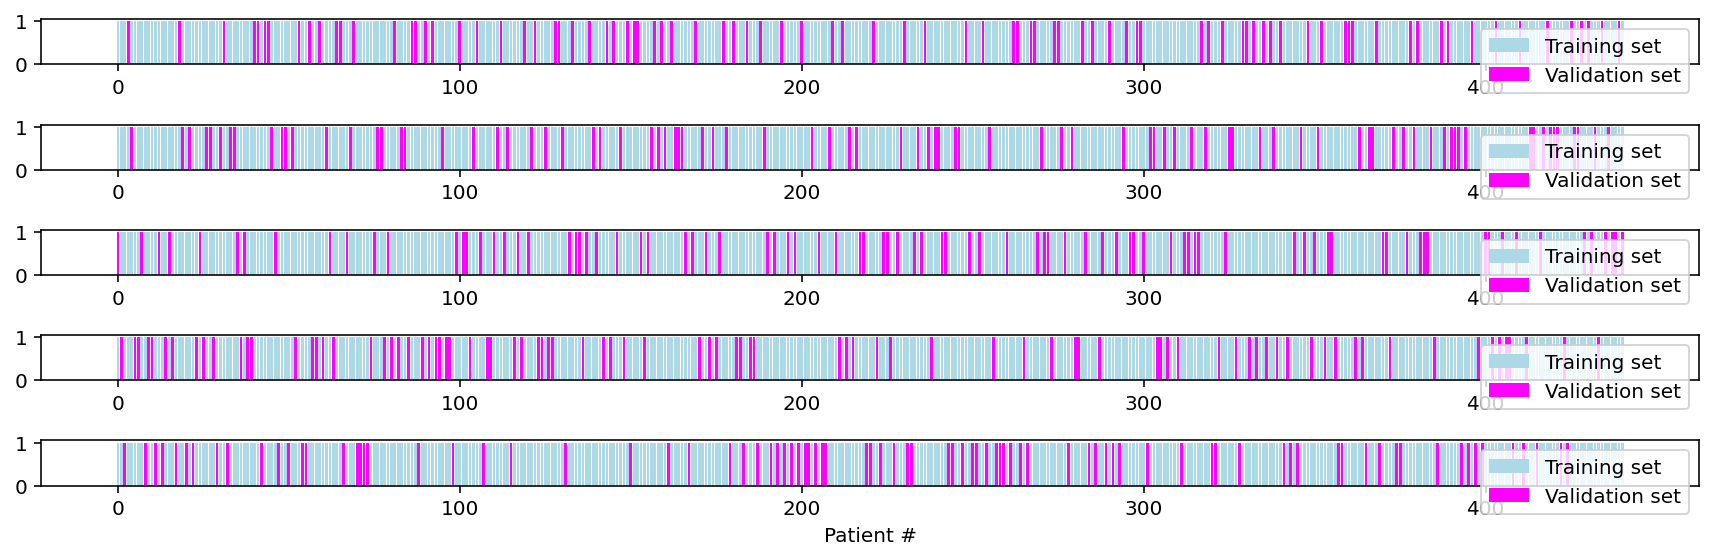

In [6]:
loo = LeaveOneOut()

alphas = np.logspace(-5, 2, 50)
mse = np.zeros(alphas.shape)

for i, alpha in enumerate(alphas):
    val_errors = []
    for train_index, val_index in loo.split(X, y):
        # training set
        Xs_train = X[train_index,:]
        ys_train = y[train_index]
        
        # validation set
        Xs_val = X[val_index,:]
        ys_val = y[val_index]
        
        # ridge model
        model = Ridge(alpha=alpha)
        
        # fit model to training set
        model.fit(Xs_train, ys_train)
        
        # get error from validation set
        val_mse = np.mean((ys_val - model.predict(Xs_val))**2)
        val_errors.append(val_mse)
    
    # for each alpha, we take the mean error across all K-folds
    mse[i] = np.mean(val_errors)
    
kf = KFold(n_splits=5, shuffle=True)

plt.figure(figsize=(12,4))
k = 1
for train_index, val_index in kf.split(Xs_train, ys_train):
    plt.subplot(5, 1, k)
    plt.bar(train_index, np.ones(train_index.shape), color='lightblue', label='Training set')
    plt.bar(val_index, np.ones(val_index.shape), color='magenta', label='Validation set')
    plt.legend()
    k += 1
plt.xlabel('Patient #')
plt.tight_layout()

4. (3 pts) Compare the Ridge and Lasso models using your testing set. Which model is preferred?

In [7]:
alphas = np.logspace(-5, 2, 50)
ridge = RidgeCV(alphas=alphas, cv=10)
ridge.fit(Xs_test, ys_test)
print(f'Ridge alpha: {ridge.alpha_:.2f}')

alphas = np.logspace(-5, 2, 50)
lasso = LassoCV(alphas=alphas, cv=10)
lasso.fit(Xs_test, ys_test)
print(f'Lasso alpha: {lasso.alpha_:.2f}')

Ridge alpha: 0.14
Lasso alpha: 0.27


A Ridge model with $\alpha \approx 0.14$ not only has a lower mean validation error, but is also more consistent (i.e. has less variation in validation error) across the K-fold partitions. Such a model is more likely to consistently generalize to new data.